In [11]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

dataset_path = "asl_dataset"
img_width, img_height = 160, 160
num_classes = 36

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=30,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess the validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=30,
    class_mode='categorical',
    subset='validation'
)

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [12]:

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Save the trained model
model.save("sign_language_model.h5")

Epoch 1/10
67/67 [==============================] - 29s 421ms/step - loss: 2.6033 - accuracy: 0.3163 - val_loss: 0.9368 - val_accuracy: 0.7396
Epoch 2/10
67/67 [==============================] - 28s 420ms/step - loss: 1.0004 - accuracy: 0.6983 - val_loss: 0.5514 - val_accuracy: 0.8083
Epoch 3/10
67/67 [==============================] - 28s 414ms/step - loss: 0.5473 - accuracy: 0.8274 - val_loss: 0.4740 - val_accuracy: 0.8271
Epoch 4/10
67/67 [==============================] - 30s 445ms/step - loss: 0.3681 - accuracy: 0.8875 - val_loss: 0.4775 - val_accuracy: 0.8375
Epoch 5/10
67/67 [==============================] - 30s 450ms/step - loss: 0.2867 - accuracy: 0.9045 - val_loss: 0.5340 - val_accuracy: 0.8479
Epoch 6/10
67/67 [==============================] - 27s 397ms/step - loss: 0.2128 - accuracy: 0.9329 - val_loss: 0.6175 - val_accuracy: 0.8313
Epoch 7/10
67/67 [==============================] - 27s 401ms/step - loss: 0.1791 - accuracy: 0.9430 - val_loss: 0.4476 - val_accuracy: 0.8417

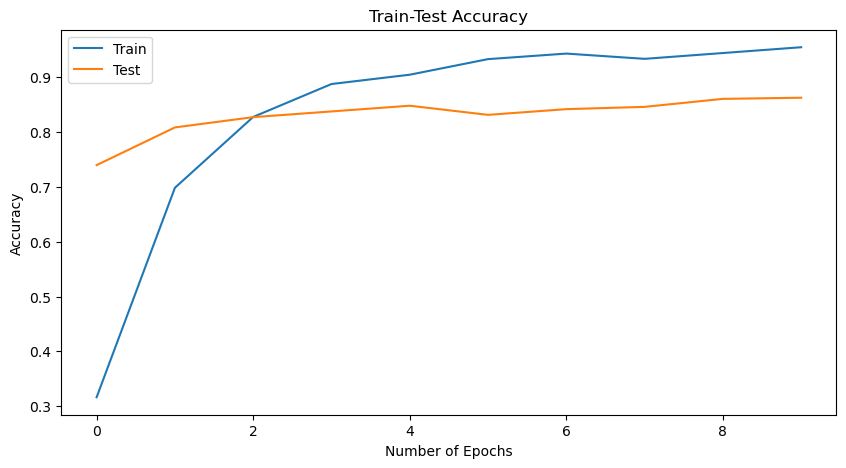

In [14]:
epochs= []
for i in range(10):
    epochs.append(i)
    
plt.figure(figsize = (10, 5))    
plt.plot(epochs,history.history['accuracy'], label="Train")
plt.plot(epochs,history.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

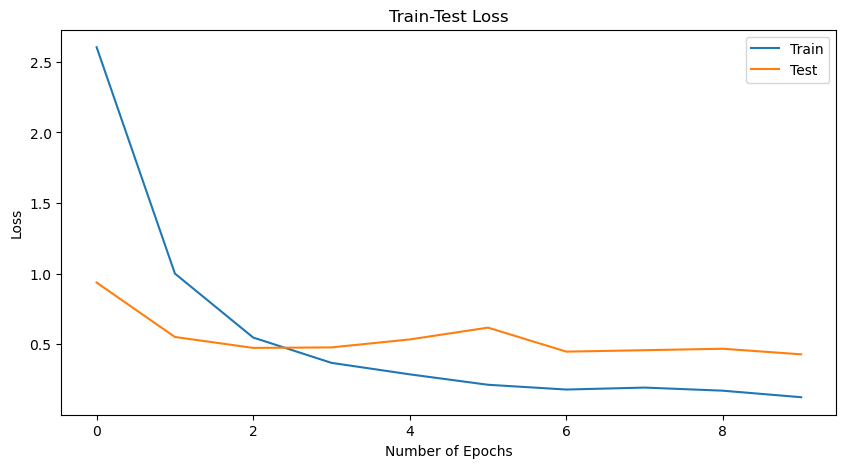

In [15]:
plt.figure(figsize = (10, 5))   
plt.plot(epochs,history.history['loss'], label="Train")
plt.plot(epochs,history.history['val_loss'], label="Test")
plt.title("Train-Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
# Load the saved model
from keras.models import load_model

model = load_model("sign_language_model.h5")

# Load and preprocess the test data
test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 503 images belonging to 36 classes.
16/16 [==============================] - 2s 136ms/step - loss: 0.4371 - accuracy: 0.8588
Test Loss: 0.43709051609039307
Test Accuracy: 0.85884690284729


In [17]:
# Predict labels for the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get the ground truth labels
true_labels = test_generator.classes

# Calculate precision, recall, and F1 score
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels))

16/16 [==============================] - 2s 145ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        14
           2       0.06      0.07      0.06        14
           3       0.07      0.07      0.07        14
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        14
           9       0.07      0.07      0.07        14
          10       0.04      0.07      0.05        14
          11       0.00      0.00      0.00        14
          12       0.07      0.07      0.07        14
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        14
          15       0.07      0.07      0.07        14
          16       0.07   